In [114]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [115]:
df = pd.read_csv('fraud_data.csv')

In [116]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [118]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,...,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,...,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,...,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.00000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282062e+06,0.000000,7.288450e+06,68.017000,9749.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.00000,15.000000,339.000000,484.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429699e+06,0.000000,1.123918e+07,117.000000,14223.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.00000,15.000000,427.000000,533.000000,554.000000,14.000000,15.000000,361.000000,169.000000,32.000000
max,3.577536e+06,1.000000,1.581105e+07,5279.950000,18390.000000,600.000000,229.000000,237.000000,536.000000,102.000000,...,225.00000,29.000000,670.000000,660.000000,854.000000,43.000000,24.000000,548.000000,216.000000,32.000000


In [119]:
df.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [120]:
#to find proportion with total

df.isFraud.value_counts(normalize=True) 

0    0.966048
1    0.033952
Name: isFraud, dtype: float64

<Axes: xlabel='isFraud', ylabel='count'>

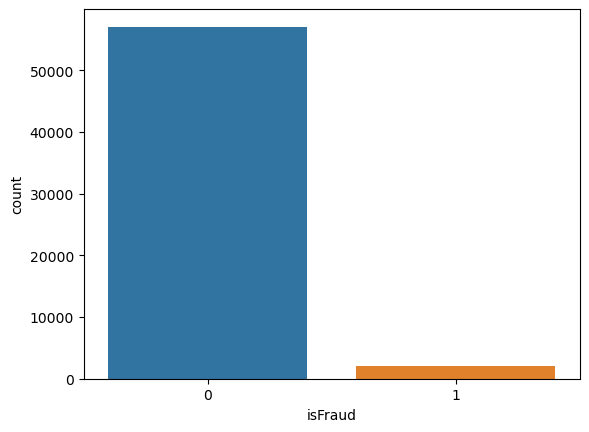

In [121]:
sns.countplot(x=df.isFraud)

In [122]:
# Missing values output

def missingvalues(data):
    misscount = df.isnull().sum().sort_values(ascending=False)
    missinpercent = round(misscount*100/len(df),2)
    missstats = pd.concat([misscount,missinpercent],axis=1,keys=['count','percent'])
    return missstats[missstats['count']!=0]


In [123]:
missingvalues(df)

,count,percent
id_24,58567,99.18
id_25,58530,99.11
id_26,58529,99.11
id_21,58529,99.11
id_22,58529,99.11
...,...,...
V316,3,0.01
V317,3,0.01
V318,3,0.01
V319,3,0.01


In [124]:
df.isnull().mean() # percent of missing values

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
id_36             0.759457
id_37             0.759457
id_38             0.759457
DeviceType        0.759796
DeviceInfo        0.798134
Length: 434, dtype: float64

In [125]:
df.columns[(df.isnull().mean()<0.2)]

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=182)

In [126]:
df=df[df.columns[df.isnull().mean()<0.2]]

In [127]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,234.0,0.0,225.500000,0.0,288.0,1707.0,1707.0,0.0,0.0,0.0
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,0.0,0.0,73.772797,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,0.0,0.0,99.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

In [129]:
df[cat_cols].mode()

,ProductCD,card4,card6,P_emaildomain
0,W,visa,debit,gmail.com


In [130]:
missingvalues(df)

,count,percent
P_emaildomain,9410,15.93
V90,8975,15.20
V76,8975,15.20
V78,8975,15.20
V79,8975,15.20
...,...,...
V285,3,0.01
V284,3,0.01
V280,3,0.01
V279,3,0.01


In [131]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [132]:
missingvalues(df) # missing values sorted

,count,percent


In [133]:
df=pd.get_dummies(df,columns=cat_cols)

In [134]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


In [135]:
X=df.drop(columns='isFraud')
y=df.isFraud

In [136]:
X

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,1,...,0,0,0,0,1,0,0,0,0,0
1,3557242,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3327470,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,1,...,0,0,0,0,0,0,0,0,0,0
3,3118781,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,1,...,0,0,0,0,0,0,0,0,0,0
4,3459772,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3549150,14898396,335.000,2616,327.0,150.0,102.0,325.0,87.0,3,...,0,0,0,0,0,0,0,0,0,0
59050,3497600,13371647,20.950,3277,111.0,150.0,226.0,231.0,87.0,118,...,0,0,0,0,0,0,0,0,0,0
59051,3575755,15775109,59.000,9486,127.0,150.0,224.0,327.0,87.0,1,...,0,0,0,0,0,0,0,0,0,0
59052,3521246,14071016,25.950,2392,360.0,150.0,126.0,469.0,87.0,4,...,0,0,0,0,0,0,0,0,0,0


In [137]:
y.value_counts() #heavily imbalanced data

0    57049
1     2005
Name: isFraud, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

### https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [140]:
#to balance data usinga type of nearest neighbours algo - SMOTE

In [141]:
from imblearn.over_sampling import SMOTE  # works only with sklearn 1.2.2(downgrade)
from imblearn.under_sampling import RandomUnderSampler

In [142]:
sm=SMOTE(sampling_strategy=0.5)
us=RandomUnderSampler(sampling_strategy=0.5)

In [143]:
X_train,y_train=sm.fit_resample(X_train,y_train)
X_train,y_train=us.fit_resample(X_train,y_train)

In [144]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([42756, 21378], dtype=int64))

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rfc=RandomForestClassifier(criterion='entropy')

In [147]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [148]:
rfc.score(X_test,y_test)

0.9776483337848821

#### Reduction of features - select k best features and re try prediction

In [149]:
from sklearn.feature_selection import SelectKBest, f_classif

In [150]:
selection = SelectKBest(score_func=f_classif,k=30)

In [151]:
X_new = selection.fit_transform(X,y)

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.25)

In [153]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [154]:
rfc.score(X_test,y_test)

0.9703332430235708

In [155]:
#top 30 variables explains gives almost same accuracy

### Cross Validation to be done here

In [156]:
from sklearn.model_selection import cross_validate

In [157]:
cv = cross_validate(estimator=rfc,X=X_new,y=y,cv=10,scoring=['accuracy','precision','recall'])
cv

{'fit_time': array([4.6586287 , 4.65964866, 4.61033964, 3.98638797, 4.54311752,
        4.7227602 , 4.89815593, 4.88897538, 4.02553153, 4.71050358]),
 'score_time': array([0.14062667, 0.11894798, 0.19485712, 0.12790251, 0.06365418,
        0.1388011 , 0.12493324, 0.12465334, 0.14062619, 0.11467886]),
 'test_accuracy': array([0.97053844, 0.96867592, 0.96833728, 0.96766001, 0.96917866,
        0.96900931, 0.96731583, 0.96833192, 0.9700254 , 0.96951736]),
 'test_precision': array([0.8       , 0.73529412, 0.64583333, 0.65625   , 0.67307692,
        0.66037736, 0.57777778, 0.62264151, 0.73469388, 0.78378378]),
 'test_recall': array([0.17910448, 0.12437811, 0.15422886, 0.10447761, 0.175     ,
        0.175     , 0.13      , 0.165     , 0.18      , 0.14427861])}

In [158]:
print(cv['test_accuracy'].mean())

0.9688590141973042


In [159]:
## GridSearch CV


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

In [161]:
rfc1=RandomForestClassifier(verbose=0)

In [162]:
criterion = ['entropy','gini']
n_estimators=[100,200] #Number of trees in random forest
max_features = ['auto','sqrt'] # Number of features to consider at every split
max_depth=[10,20,None] #'None' in max_depth i.e. no maximum depth to be considered.

params = {
    'criterion':criterion,
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth
}

In [163]:
gs=GridSearchCV(rfc1,param_grid=params,verbose=1,n_jobs=2)

In [164]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]},
             verbose=1)

In [165]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [166]:
gs.best_score_

0.9687739896139084

In [167]:
gs.score(X_test,y_test)

0.9705364399891628